<a href="https://colab.research.google.com/github/Janet-33/hello-world/blob/main/dphi_fraud_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# the below code is for displaying the output from all lines of python code within a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# A fundamental package for linear algebra and multidimensional arrays
import pandas as pd                  

# Data analysis and data manipulating tool
import numpy as np                   

# Library to generate random numbers
import random                        

# Collection is a Python module that implements specialized container datatypes providing 
# Counter is a dict subclass for counting hashable objects
from collections import Counter      
                                     
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

# to display up to 500 rows in the output of the jupyter notebook cell
pd.set_option('display.max_rows', 500)

In [2]:
# importing the fraud dataset
fraud_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Imbalanced_classes/master/fraud_data.csv")

In [3]:
fraud_data.shape

(59054, 434)

In [4]:
fraud_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,credit,269.0,87.0,NaN,NaN,yahoo.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.791666,0.791666,...,0.0,82050.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,NaN,529.0,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10.12,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,debit,181.0,87.0,483.0,NaN,gmail.com,NaN,1,4,0,0,0,1,0,0,3,0,3,0,4,1,63.0,35.0,1.0,4.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,credit,284.0,60.0,NaN,NaN,hotmail.com,hotmail.com,1,3,0,1,0,1,1,0,0,0,2,2,3,1,54.0,54.0,35.0,54.0,35.0,54.0,35.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,credit,441.0,87.0,NaN,371.0,anonymous.com,anonymous.com,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,183599.0,NaN,NaN,6.0,-11.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,15.0,352.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 10.3.3,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,debit,264.0,87.0,10.0,NaN,yahoo.com,NaN,3,3,0,0,3,4,0,0,3,0,2,0,33,3,54.0,54.0,15.0,405.0,32.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 195.5+ MB


0    57049
1     2005
Name: isFraud, dtype: int64

0    96.604802
1     3.395198
Name: isFraud, dtype: float64

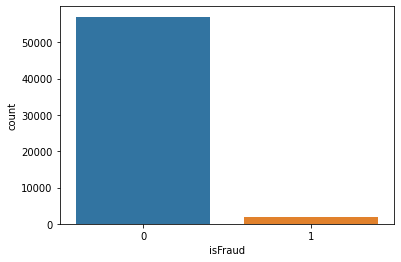

In [6]:
# Taking a look at the target variable
# isFraud = 0 --> normal transaction
# isFraud = 1 --> fraudulent transaction
fraud_data.isFraud.value_counts()
fraud_data.isFraud.value_counts(normalize=True) * 100

# visualize the target variable column
sns.countplot(fraud_data.isFraud)

# interpreting the results - 3.40% of transactions are fraudulent and 99.60% of transactions are normal

In [7]:
# Missing values - To get percentage of missing data in each column
fraud_data.isnull().sum() / len(fraud_data) * 100   

# getting all the numerical columns
num_cols = fraud_data.select_dtypes(include=np.number).columns 
# filling missing values of numerical columns with mean value
fraud_data[num_cols] = fraud_data[num_cols].fillna(fraud_data[num_cols].mean())   # fills the missing values with mean

# getting all the categorical columns
cat_cols = fraud_data.select_dtypes(include = 'object').columns    

# fills the missing values with maximum occuring element in the column
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0])

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
card1              0.000000
card2              1.549429
card3              0.267552
card4              0.274325
card5              0.751854
card6              0.269245
addr1             11.392962
addr2             11.392962
dist1             59.865547
dist2             93.443289
P_emaildomain     15.934568
R_emaildomain     76.572290
C1                 0.000000
C2                 0.000000
C3                 0.000000
C4                 0.000000
C5                 0.000000
C6                 0.000000
C7                 0.000000
C8                 0.000000
C9                 0.000000
C10                0.000000
C11                0.000000
C12                0.000000
C13                0.000000
C14                0.000000
D1                 0.204897
D2                47.336336
D3                44.391574
D4                28.526433
D5                52

In [8]:
# Let's have a look if there still exist any missing values
fraud_data.isnull().sum() / len(fraud_data) * 100

TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
card1             0.0
card2             0.0
card3             0.0
card4             0.0
card5             0.0
card6             0.0
addr1             0.0
addr2             0.0
dist1             0.0
dist2             0.0
P_emaildomain     0.0
R_emaildomain     0.0
C1                0.0
C2                0.0
C3                0.0
C4                0.0
C5                0.0
C6                0.0
C7                0.0
C8                0.0
C9                0.0
C10               0.0
C11               0.0
C12               0.0
C13               0.0
C14               0.0
D1                0.0
D2                0.0
D3                0.0
D4                0.0
D5                0.0
D6                0.0
D7                0.0
D8                0.0
D9                0.0
D10               0.0
D11               0.0
D12               0.0
D13               0.0
D14               0.0
D15       

In [9]:
# earlier we have collected all the categorical columns in cat_cols
fraud_data.shape
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0])
fraud_data = pd.get_dummies(fraud_data, columns=cat_cols)
fraud_data.shape
fraud_data.head()

(59054, 434)

(59054, 1667)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,DeviceInfo_gxq6580_weg_l Build/LMY47I,DeviceInfo_hi6210sft Build/MRA58K,DeviceInfo_hp2015,DeviceInfo_iOS Device,DeviceInfo_iris 820 Build/MRA58K,DeviceInfo_iris702,DeviceInfo_moto,DeviceInfo_moto x4 Build/NPW26.83-18-2-0-4,DeviceInfo_moto x4 Build/OPW27.57-40,DeviceInfo_moto x4 Build/OPWS27.57-40-6,DeviceInfo_orbis,DeviceInfo_rv:11.0,DeviceInfo_rv:31.0,DeviceInfo_rv:33.0,DeviceInfo_rv:35.0,DeviceInfo_rv:38.0,DeviceInfo_rv:39.0,DeviceInfo_rv:41.0,DeviceInfo_rv:42.0,DeviceInfo_rv:43.0,DeviceInfo_rv:45.0,DeviceInfo_rv:46.0,DeviceInfo_rv:47.0,DeviceInfo_rv:48.0,DeviceInfo_rv:49.0,DeviceInfo_rv:50.0,DeviceInfo_rv:51.0,DeviceInfo_rv:52.0,DeviceInfo_rv:52.9,DeviceInfo_rv:53.0,DeviceInfo_rv:54.0,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo
0,2994681,0,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,115.655837,215.529442,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.0,168.784855,28.215689,139.992561,42.073375,70.105107,41.39397,7.791666,0.791666,124.267325,147.2328,54.019149,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,3557242,0,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,483.000000,215.529442,1,4,0,0,0,1,0,0,3,0,3,0,4,1,63.0,35.000000,1.000000,4.000000,4.000000,70.105107,41.39397,145.864171,0.552242,4.000000,4.0000,54.019149,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3327470,0,8378575,73.773,12778,500.0,185.0,224.0,284.0,60.0,115.655837,215.529442,1,3,0,1,0,1,1,0,0,0,2,2,3,1,54.0,54.000000,35.000000,54.000000,35.000000,54.000000,35.00000,145.864171,0.552242,0.000000,147.2328,54.000000,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3118781,0,2607840,400.000,12316,548.0,150.0,195.0,441.0,87.0,115.655837,371.000000,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0.0,168.784855,28.215689,139.992561,42.073375,70.105107,41.39397,145.864171,0.552242,124.267325,147.2328,54.019149,18.44513,57.257084,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3459772,0,12226544,31.950,9002,453.0,150.0,226.0,264.0,87.0,10.000000,215.529442,3,3,0,0,3,4,0,0,3,0,2,0,33,3,54.0,54.000000,15.000000,405.000000,32.000000,70.105107,41.39397,145.864171,0.552242,71.000000,405.0000,54.019149,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Separate input features and output feature
# input features
X = fraud_data.drop(columns = ['isFraud'])       

# output feature
Y = fraud_data.isFraud

In [11]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns

# Let's see how the data looks after scaling
scaled_features.head()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,...,DeviceInfo_gxq6580_weg_l Build/LMY47I,DeviceInfo_hi6210sft Build/MRA58K,DeviceInfo_hp2015,DeviceInfo_iOS Device,DeviceInfo_iris 820 Build/MRA58K,DeviceInfo_iris702,DeviceInfo_moto,DeviceInfo_moto x4 Build/NPW26.83-18-2-0-4,DeviceInfo_moto x4 Build/OPW27.57-40,DeviceInfo_moto x4 Build/OPWS27.57-40-6,DeviceInfo_orbis,DeviceInfo_rv:11.0,DeviceInfo_rv:31.0,DeviceInfo_rv:33.0,DeviceInfo_rv:35.0,DeviceInfo_rv:38.0,DeviceInfo_rv:39.0,DeviceInfo_rv:41.0,DeviceInfo_rv:42.0,DeviceInfo_rv:43.0,DeviceInfo_rv:45.0,DeviceInfo_rv:46.0,DeviceInfo_rv:47.0,DeviceInfo_rv:48.0,DeviceInfo_rv:49.0,DeviceInfo_rv:50.0,DeviceInfo_rv:51.0,DeviceInfo_rv:52.0,DeviceInfo_rv:52.9,DeviceInfo_rv:53.0,DeviceInfo_rv:54.0,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo
0,-1.688548,-1.544958,-0.468203,-0.021940,1.412632,-0.286861,0.653753,-0.225982,0.077832,1.224253e-16,2.190310e-16,-0.099186,-0.092969,-0.034155,-0.057671,-0.214317,-0.113785,-0.043835,-0.040593,-0.266499,-0.041472,-0.098587,-0.044784,-0.246816,-0.149534,-0.598309,0.000000,-7.619398e-17,0.000000,0.000000,-2.810043e-16,2.792120e-16,-1.652719e+00,2.094196e+00,-8.312926e-17,0.000000,-3.458197e-16,0.0,-1.612884e-16,-1.524289e-16,...,-0.00582,-0.015399,-0.004115,-0.184841,-0.004115,-0.004115,-0.00582,-0.01008,-0.004115,-0.00582,-0.004115,-0.057854,-0.01008,-0.004115,-0.00582,-0.00582,-0.00582,-0.004115,-0.00582,-0.004115,-0.009202,-0.00582,-0.01164,-0.01594,-0.004115,-0.00582,-0.00823,-0.018406,-0.004115,-0.007128,-0.00582,-0.004115,67.391508,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
1,1.615662,1.681426,-0.073540,-0.406928,-1.078794,-0.286861,-0.804662,-1.144356,0.077832,1.582320e+00,2.190310e-16,-0.099186,-0.071893,-0.034155,-0.057671,-0.214317,-0.113785,-0.043835,-0.052023,-0.085706,-0.052858,-0.075654,-0.044784,-0.222665,-0.149534,-0.198351,-1.039716,-5.836866e-01,-0.842241,-0.625664,-2.810043e-16,2.792120e-16,-1.020618e-15,-1.553743e-14,-7.035279e-01,-1.064971,-3.458197e-16,0.0,-1.612884e-16,-8.579195e-01,...,-0.00582,-0.015399,-0.004115,-0.184841,-0.004115,-0.004115,-0.00582,-0.01008,-0.004115,-0.00582,-0.004115,-0.057854,-0.01008,-0.004115,-0.00582,-0.00582,-0.00582,-0.004115,-0.00582,-0.004115,-0.009202,-0.00582,-0.01164,-0.01594,-0.004115,-0.00582,-0.00823,-0.018406,-0.004115,-0.007128,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
2,0.266093,0.219070,-0.258976,0.585989,0.881042,2.788641,0.605139,-0.069441,-10.788933,1.224253e-16,2.190310e-16,-0.099186,-0.078918,-0.034155,-0.041973,-0.214317,-0.113785,-0.026137,-0.052023,-0.266499,-0.052858,-0.087120,-0.019564,-0.230715,-0.149534,-0.255488,-0.892057,1.455011e-01,-0.532577,-0.116237,-3.184610e-01,-2.512549e-01,-1.020618e-15,-1.553743e-14,-7.269267e-01,0.000000,-4.659874e-04,0.0,-1.612884e-16,-5.897637e-01,...,-0.00582,-0.015399,-0.004115,-0.184841,-0.004115,-0.004115,-0.00582,-0.01008,-0.004115,-0.00582,-0.004115,-0.057854,-0.01008,-0.004115,-0.00582,-0.00582,-0.00582,-0.004115,-0.00582,-0.004115,-0.009202,-0.00582,-0.01164,-0.01594,-0.004115,-0.00582,-0.00823,-0.018406,-0.004115,-0.007128,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
3,-0.959645,-1.032167,1.140478,0.491581,1.188468,-0.286861,-0.099761,1.569022,0.077832,1.224253e-16,1.198129e+00,-0.099186,-0.092969,-0.034155,-0.041973,-0.214317,-0.113785,-0.043835,-0.040593,-0.266499,-0.041472,-0.098587,-0.044784,-0.246816,-0.149534,-0.598309,0.000000,-7.619398e-17,0.000000,0.000000,-2.810043e-16,2.792120e-16,-1.020618e-15,-1.553743e-14,-8.312926e-17,0.000000,-3.458197e-16,0.0,-1.612884e-16,-1.524289e-16,...,-0.00582,-0.015399,-0.004115,5.41004

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# X_train: independent feature data for training the model
# Y_train: dependent feature data for training the model
# X_test: independent feature data for testing the model; will be used to predict the target values
# Y_test: original target values of X_test; We will compare this values with our predicted values.
 
# test_size = 0.3: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

In [13]:
# 'resample' is located under sklearn.utils
from sklearn.utils import resample

# concatenate training data back together
train_data = pd.concat([X_train, Y_train], axis = 1)

# separate minority and majority class
not_fraud = train_data[train_data.isFraud==0]
fraud = train_data[train_data.isFraud==1]

In [14]:
# Unsample minority; we are oversampling the minority class to match the number of majority classs
fraud_upsampled = resample(fraud,
                           replace = True, # Sample with replacement
                           n_samples = len(not_fraud), # Match number in majority class
                           random_state=27)

In [15]:
# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [16]:
# Now let's check the classes count
upsampled.isFraud.value_counts()

# We can notice here after resampling we have an equal ratio of data points for each class!

1    39942
0    39942
Name: isFraud, dtype: int64

In [17]:
# we are still using our separated class i.e. fraud and not_fraud from above
# Again we are removing the observations of the majority class to mathch the number of minority class
# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27)

In [18]:
# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])    # Concatenation

In [19]:
# let's check the classes counts
downsampled.isFraud.value_counts()

# we have an equal ratio of fraud to not fraud data points, but in this case 
# a much smaller quantity of data to train the model on.

1    1395
0    1395
Name: isFraud, dtype: int64

In [20]:
X_train.head()
Y_train.head()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,...,DeviceInfo_gxq6580_weg_l Build/LMY47I,DeviceInfo_hi6210sft Build/MRA58K,DeviceInfo_hp2015,DeviceInfo_iOS Device,DeviceInfo_iris 820 Build/MRA58K,DeviceInfo_iris702,DeviceInfo_moto,DeviceInfo_moto x4 Build/NPW26.83-18-2-0-4,DeviceInfo_moto x4 Build/OPW27.57-40,DeviceInfo_moto x4 Build/OPWS27.57-40-6,DeviceInfo_orbis,DeviceInfo_rv:11.0,DeviceInfo_rv:31.0,DeviceInfo_rv:33.0,DeviceInfo_rv:35.0,DeviceInfo_rv:38.0,DeviceInfo_rv:39.0,DeviceInfo_rv:41.0,DeviceInfo_rv:42.0,DeviceInfo_rv:43.0,DeviceInfo_rv:45.0,DeviceInfo_rv:46.0,DeviceInfo_rv:47.0,DeviceInfo_rv:48.0,DeviceInfo_rv:49.0,DeviceInfo_rv:50.0,DeviceInfo_rv:51.0,DeviceInfo_rv:52.0,DeviceInfo_rv:52.9,DeviceInfo_rv:53.0,DeviceInfo_rv:54.0,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo
20911,3145586,3331547,107.95,1214,523.0,150.0,226.0,123.0,87.0,8.000000,215.529442,1,1,0,0,1,1,0,0,1,0,1,0,14,1,500.0,500.000000,22.000000,437.0,22.0,70.105107,41.39397,145.864171,0.552242,500.0,411.0000,54.019149,18.44513,57.257084,500.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4756,3552524,14999631,59.00,10112,360.0,150.0,166.0,184.0,87.0,63.000000,215.529442,3,1,0,0,0,2,0,0,1,0,1,1,18,3,336.0,336.000000,14.000000,361.0,14.0,70.105107,41.39397,145.864171,0.552242,361.0,361.0000,54.019149,18.44513,57.257084,361.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50447,3480494,12871254,39.00,1762,161.0,150.0,226.0,441.0,87.0,18.000000,215.529442,1,1,0,0,0,2,0,0,1,0,1,0,21,1,242.0,151.000000,2.000000,151.0,2.0,70.105107,41.39397,145.864171,0.552242,242.0,242.0000,54.019149,18.44513,57.257084,242.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13104,3232758,5853279,113.00,17188,321.0,150.0,226.0,299.0,87.0,115.655837,215.529442,2,1,0,0,0,1,0,0,0,0,1,0,19,2,0.0,168.784855,28.215689,479.0,152.0,70.105107,41.39397,145.864171,0.552242,479.0,147.2328,54.019149,18.44513,57.257084,479.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15845,3118652,2603679,50.00,2455,321.0,150.0,226.0,299.0,87.0,6.000000,215.529442,4,3,0,0,1,2,0,0,1,0,2,0,25,4,20.0,20.000000,0.000000,499.0,124.0,70.105107,41.39397,145.864171,0.552242,499.0,448.0000,54.019149,18.44513,57.257084,41.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


20911    0
4756     0
50447    0
13104    0
15845    0
Name: isFraud, dtype: int64

In [21]:
Y_train.value_counts()

0    39942
1     1395
Name: isFraud, dtype: int64

In [22]:
# import SMOTE 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)   # again we are eqalizing both the classes

In [23]:
# fit the sampling
X_train, Y_train = sm.fit_sample(X_train, Y_train)

In [24]:
Y_train.dtype

dtype('int64')